## Principal Component Analysis

### Index 
- [Equation and Method](#equation)
- [Pre processing](#preprocessing)
- [Building the model](#building)
- [Result](#result)

In [1]:
# importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='equation'></a>
### Equation and Method

Linear Discriminant Analysis basically fits a line on which we can project the data points in such a way that the spacial seperation between them is maximised. LDA is also a supervised method. The spacial seperability factor is measured with the help by measuring the mean, the centroid and the spread. This information can be used to fit a line on which we can project the data points without them overlapping on each other.

<img src='https://i.stack.imgur.com/9k7iT.png' style='margin:0px;' width=300>

This new axis can be used to apply the various classification models

<a id='preprocessing'></a>
### Pre processing

In [2]:
## importing the libraries for simple linear regression.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
dataset = pd.read_csv('Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


The objective of this exercise is to predict the wine into how the consumers will like with the help of their chemical composition. But there is a problem that we cannot visualise the results as there are a lot of dimensions. We will apply pca to solve the problem.

In [4]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
# Normalising the vectors.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id='building'></a>
### Building the model.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

##### Applying PCA
First we need to understand the variance of the different dimensions in determining our result. So for that we will consider all the components and then select the most relevant ones.

We can see that the first two variables contribute to more than 50% of the variance. And the other variables only contribute to little variance. So we can select these two variables and do the classification.

In [10]:
# Applying PCA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
explained_variance = lda.explained_variance_ratio_

In [11]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

<a id='result'></a>
### Result

In [14]:
def plot_regions(x, y, title):
    X_set, y_set = x, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    plt.title('Logistic Regression (Training set)')
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    plt.legend()
    plt.show()

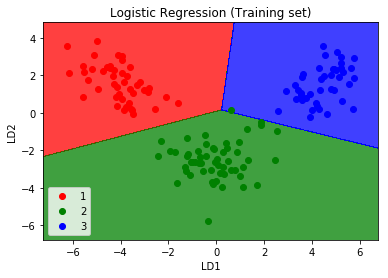

In [15]:
plot_regions(X_train, y_train, 'Classifier (Training set)')

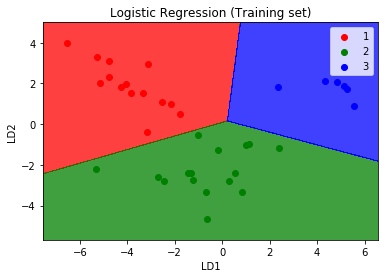

In [16]:
plot_regions(X_test, y_test, 'Classifier (Test set)')

##### Conclusion
We can see that LDA does a better job than PCA in reducing the dimension and then helping us classify the data points. We can also see that it transforms the only 2 dimensions in such a way that all the data points can be seperated spacially in a way we can classify them with very good accuracy as well as in a way that we can see how spread apart they are. This can be very useful in helping the producer identify the different segment the customers belong to, according to the data.